<a href="https://colab.research.google.com/github/saisampaththumati-datascientists/Unsup-Clustering/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using the food images  
### This is CNN (Convolutional Neural Network) With the help of computer vision we are able to classify the whether the pic is what type of food  

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import os

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-06-19 18:27:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.4MB/s    in 5.9s    

2024-06-19 18:27:27 (17.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
ls pizza_steak/test/pizza/1459760.jpg

pizza_steak/test/pizza/1459760.jpg


In [4]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
ls pizza_steak/test/

pizza/  steak/


In [6]:
# we are trying get the names for the pic
data_dir="pizza_steak/train"
name_of_classes=os.listdir(data_dir)
name_of_classes

['steak', 'pizza']

In [7]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (341, 512, 3)


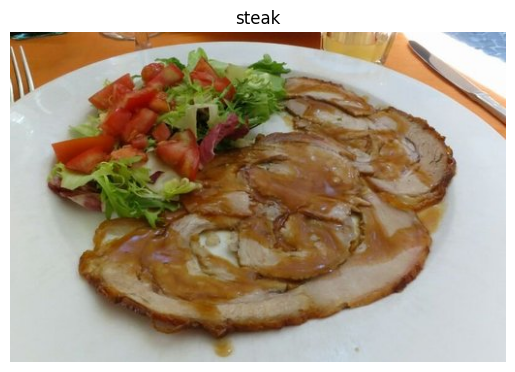

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

array([[[ 13,  11,   0],
        [ 14,  12,   0],
        [ 18,  11,   1],
        ...,
        [120, 153, 184],
        [128, 162, 190],
        [116, 150, 178]],

       [[ 14,  11,   2],
        [ 18,  14,   5],
        [ 19,  15,   6],
        ...,
        [151, 184, 215],
        [169, 202, 233],
        [161, 195, 223]],

       [[ 11,   6,   0],
        [  9,   4,   0],
        [ 10,   5,   0],
        ...,
        [172, 205, 236],
        [178, 211, 242],
        [166, 199, 230]],

       ...,

       [[204, 210, 208],
        [204, 210, 208],
        [204, 210, 208],
        ...,
        [216, 221, 225],
        [216, 221, 225],
        [216, 221, 225]],

       [[204, 210, 208],
        [204, 210, 208],
        [204, 210, 208],
        ...,
        [216, 221, 225],
        [216, 221, 225],
        [216, 221, 225]],

       [[204, 210, 208],
        [204, 210, 208],
        [204, 210, 208],
        ...,
        [216, 221, 225],
        [215, 220, 224],
        [215, 220, 224]]], dtype=uint8)
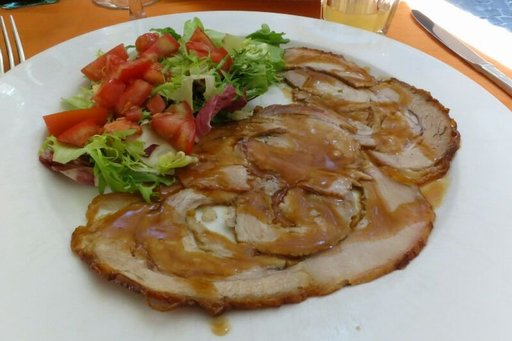

In [9]:
img

## Lets build the cnn (convalution nural network ) we will do the preprocessing the model. Add the hyper parameter Like
- Input Image  
- Input Layer
- Convalution Layer
- Hidden Layer
- Pooling Layer
- fully connected layer
- output layer
- output activation

- After that will compile the cnn and fit the cnn

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_dir="pizza_steak/train"
val_dir="pizza_steak/test"
#why we are taking 255 is the pix length
train_scale=ImageDataGenerator(rescale=1/255)
val_scale=ImageDataGenerator(rescale=1/255)
train=train_scale.flow_from_directory(directory=train_dir,target_size=(224,224),batch_size=32,class_mode="binary")
val=val_scale.flow_from_directory(directory=val_dir,target_size=(224,224),batch_size=32,class_mode="binary")
model=tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ])
#model compile
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
#model fit
history=model.fit(train,epochs=5,steps_per_epoch=len(train),validation_data=val,validation_steps=len(val))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 7s 123ms/step - loss: 0.5524 - accuracy: 0.7173 - val_loss: 0.4086 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4505 - accuracy: 0.8147 - val_loss: 0.3834 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.4380 - accuracy: 0.8113 - val_loss: 0.3641 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3968 - accuracy: 0.8347 - val_loss: 0.3546 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3419 - accuracy: 0.8587 - val_loss: 0.3555 - val_accuracy: 0.8700


<Axes: >

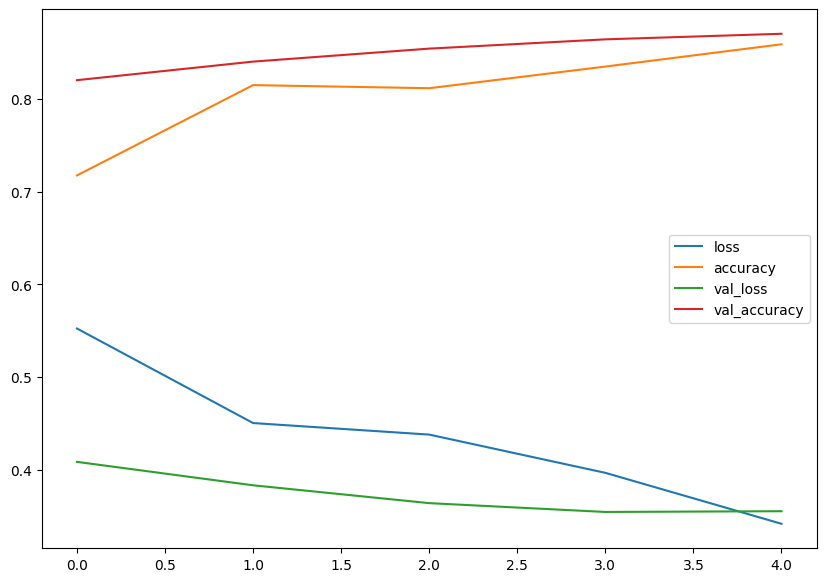

In [15]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

# Lets replicate the model that we have used for basic classification and linear regresstion model

In [21]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(224,224,3)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ])
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_2=model_2.fit(train,epochs=5,steps_per_epoch=len(train),validation_data=val,validation_steps=len(val))

Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 3.0847 - accuracy: 0.5000 - val_loss: 1.3091 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.8395 - accuracy: 0.4993 - val_loss: 0.6961 - val_accuracy: 0.4980
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6903 - accuracy: 0.5033 - val_loss: 0.6741 - val_accuracy: 0.5200
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6591 - accuracy: 0.6280 - val_loss: 0.6415 - val_accuracy: 0.6300
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6316 - accuracy: 0.6913 - val_loss: 0.6173 - val_accuracy: 0.7020


In [27]:
model_3= tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(224,224,3)),
        tf.keras.layers.Dense(10,activation="relu"),
        tf.keras.layers.Dense(10,activation="relu"),
        tf.keras.layers.Dense(10,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ])
model_3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_3.fit(train,epochs=50,steps_per_epoch=len(train),validation_data=val,validation_steps=len(val))
model_3.evaluate(train)

Epoch 1/50
47/47 [==============================] - 8s 130ms/step - loss: 1.1518 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
47/47 [==============================] - 6s 128ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
47/47 [==============================] - 8s 162ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 

[0.6931471228599548, 0.5]